In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread("Backgrounds-Dinosaur-Wallpaper-HD.jpg")

In [13]:
def imshow(img, title='Image'):
    plt.figure(figsize=(8,6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.title(title)
    plt.axis("off")
    plt.show()


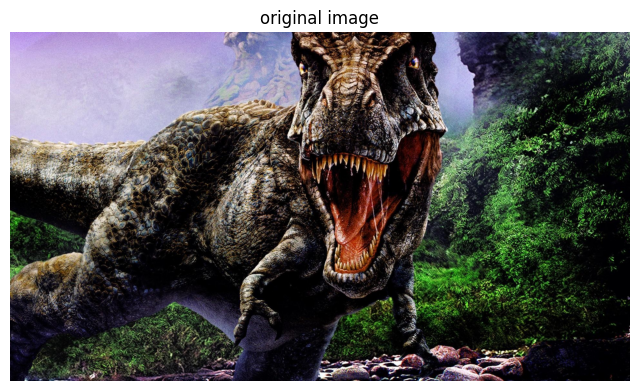

In [14]:
imshow(img, "original image")

### Converting to Gray Images

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

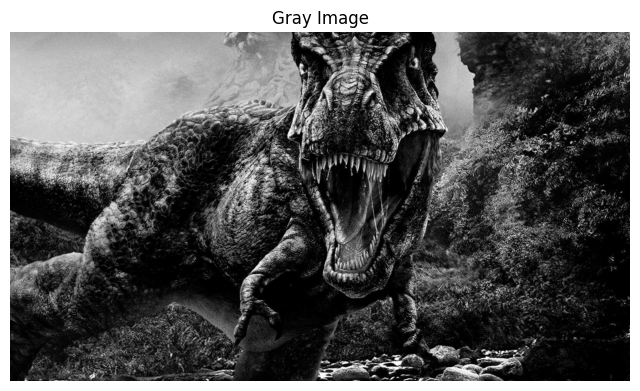

In [17]:
imshow(gray, "Gray Image")

### Converting to HSV Images

In [18]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

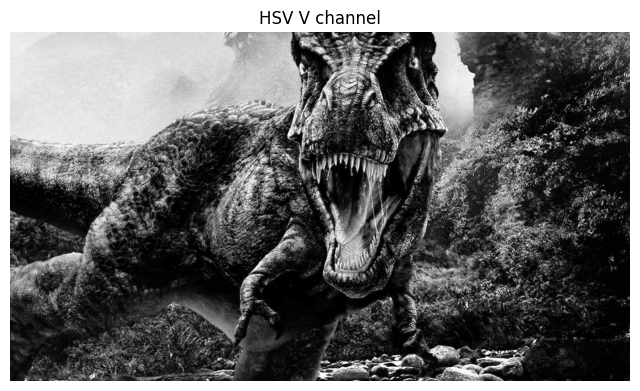

In [33]:
imshow(hsv_img[:,:,2], "HSV V channel")

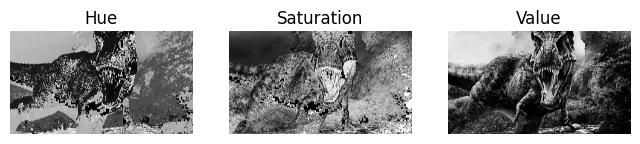

In [31]:
# Split into channels
h, s, v = cv2.split(hsv_img)

# Show channels
titles = ['Hue', 'Saturation', 'Value']
channels = [h, s, v]

plt.figure(figsize=(8,6))
for i in range(3):
    
    plt.subplot(1, 3, i+1)
    plt.imshow(channels[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

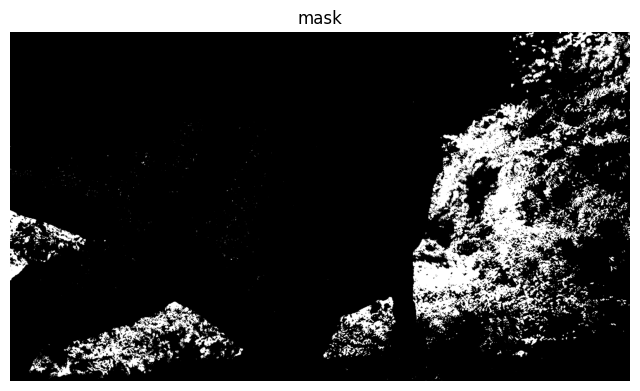

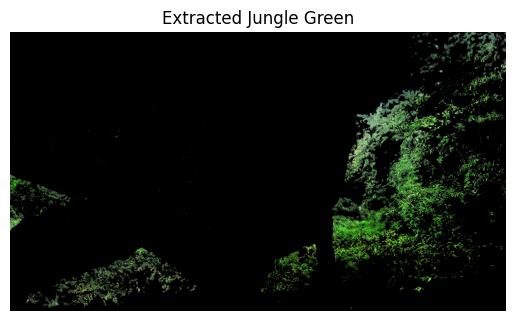

In [73]:
# Define green range
lower_green = (35, 50, 50)
upper_green = (85, 255, 255)

mask = cv2.inRange(hsv_img, lower_green, upper_green)
imshow(mask, "mask")
green_only = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(green_only, cv2.COLOR_BGR2RGB))
plt.title("Extracted Jungle Green")
plt.axis("off")
plt.show()

In [37]:
h, w, _ = hsv_img.shape
y, x = h // 2, w // 2   # middle of image
pixel = hsv_img[y, x]
print("Center pixel HSV:", pixel)

Center pixel HSV: [ 16 143 118]


### Converting to LAB Images

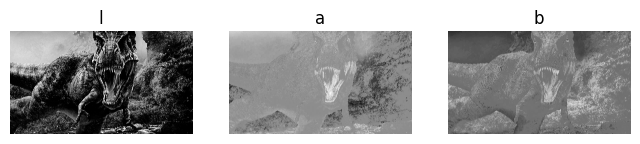

In [39]:
lab  = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

l,a,b = cv2.split(lab)

titles = ['l', 'a', 'b']
channels = [l, a, b]

plt.figure(figsize=(8,6))
for i in range(3):
    
    plt.subplot(1, 3, i+1)
    plt.imshow(channels[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


In [48]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Function to get HSV values on mouse click
def pick_color(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # Left click
        pixel = hsv[y, x]  # [H, S, V]
        print(f"Clicked Pixel at ({x},{y}) -> HSV: {pixel}")

        # Show the selected color
        color_bgr = img[y, x].tolist()
        color_patch = np.zeros((100, 100, 3), dtype=np.uint8)
        color_patch[:] = color_bgr
        cv2.imshow("Selected Color", color_patch)

# Open window
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", pick_color)

while True:
    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == 27:  # Press ESC to exit
        break

cv2.destroyAllWindows()

Clicked Pixel at (1077,571) -> HSV: [173  11  89]
Clicked Pixel at (1280,575) -> HSV: [  5 148  38]
Clicked Pixel at (1072,729) -> HSV: [ 12 173  68]
Clicked Pixel at (1443,319) -> HSV: [109  68 207]
Clicked Pixel at (1314,371) -> HSV: [ 76  24 183]


### Normalize Image

In [50]:
print(f"Max Pixels {img.max()}, Min Pixel {img.min()}")

Max Pixels 255, Min Pixel 0


In [56]:
norm_img = img.astype(np.float32)/ 255.0
print("Range:", norm_img.min(), norm_img.max())
print(type(norm_img))
print(norm_img.shape)

Range: 0.0 1.0
<class 'numpy.ndarray'>
(2160, 3840, 3)


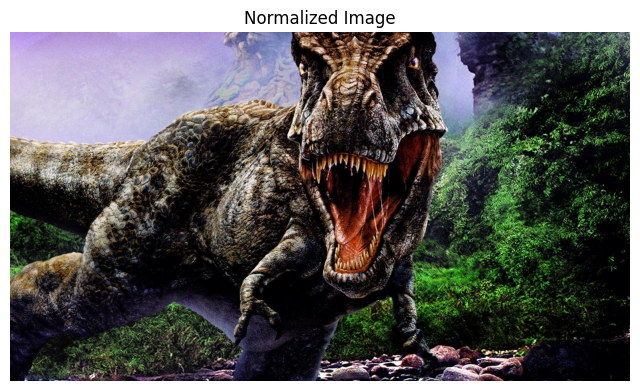

In [53]:
imshow(norm_img, "Normalized Image")

In [60]:
norm_img2 = cv2.normalize(img, None, alpha=0, beta=255, 
                         norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
print(type(norm_img2))
print(norm_img2.shape)
print("Range:", norm_img2.min(), norm_img2.max())

<class 'numpy.ndarray'>
(2160, 3840, 3)
Range: 0 255


### Resize Image

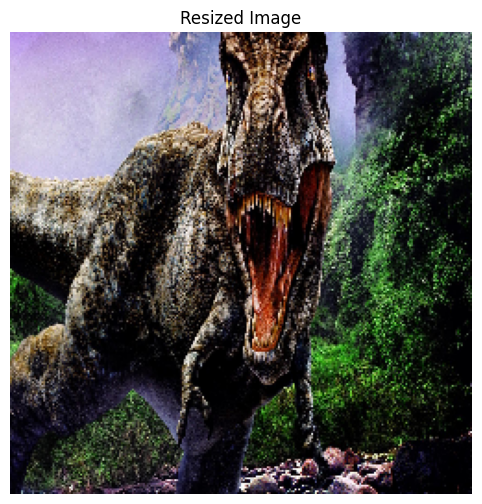

(250, 250, 3)
Range: 0 255


In [62]:
resized_img = cv2.resize(img, (250,250))
imshow(resized_img, "Resized Image")
print(resized_img.shape)
print("Range:", resized_img.min(), resized_img.max())

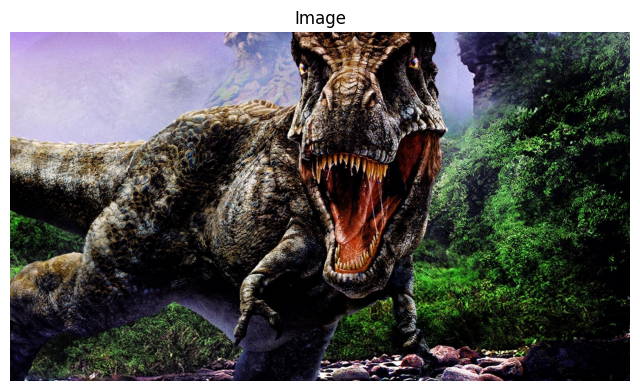

(1080, 1920, 3)
Range: 0 255


In [65]:
resized_scale = cv2.resize(img, None, fx=0.5, fy=0.5)
imshow(resized_scale)
print(resized_scale.shape)
print("Range:", resized_scale.min(), resized_scale.max())

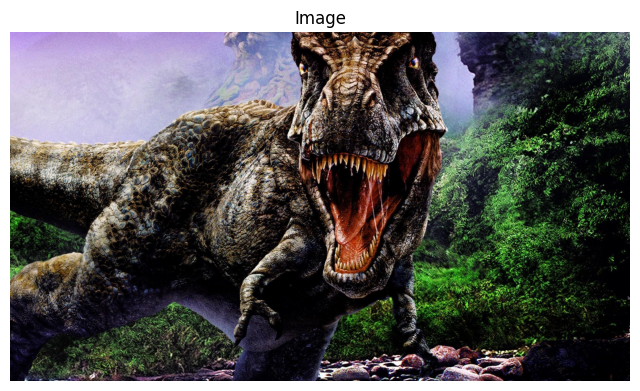

(4320, 7680, 3)
Range: 0 255


In [66]:
resized_up   = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)   
imshow(resized_up)
print(resized_up.shape)
print("Range:", resized_up.min(), resized_up.max())

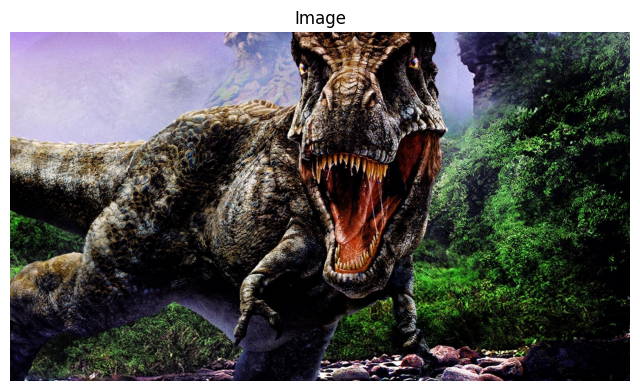

(1080, 1920, 3)
Range: 0 255


In [67]:
resized_down = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
imshow(resized_down)
print(resized_down.shape)
print("Range:", resized_down.min(), resized_down.max())

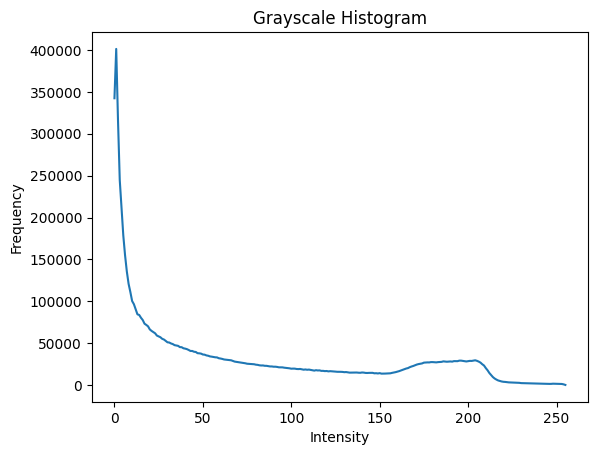

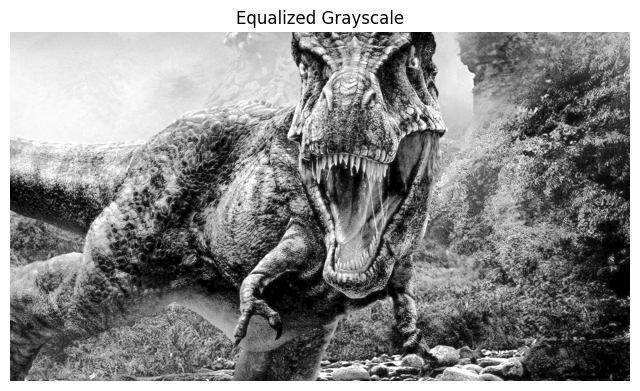

In [68]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray],[0],None,[256],[0,256]).flatten()

plt.figure()
plt.plot(hist)
plt.title('Grayscale Histogram')
plt.xlabel('Intensity'); plt.ylabel('Frequency')
plt.show()

eq = cv2.equalizeHist(gray)
imshow(eq, 'Equalized Grayscale')

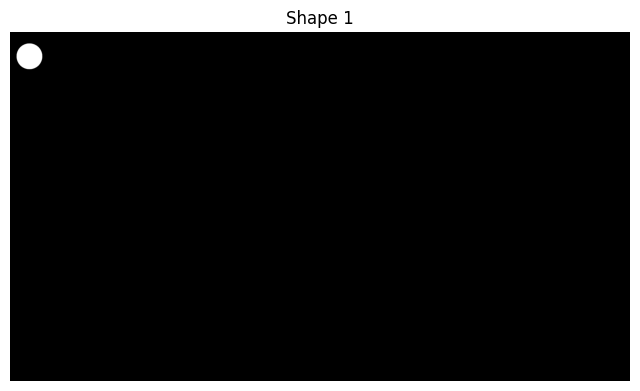

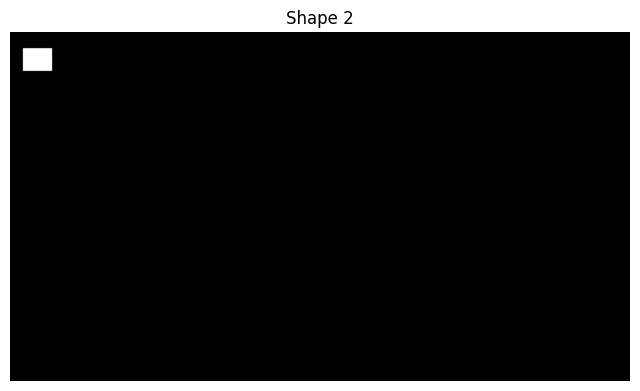

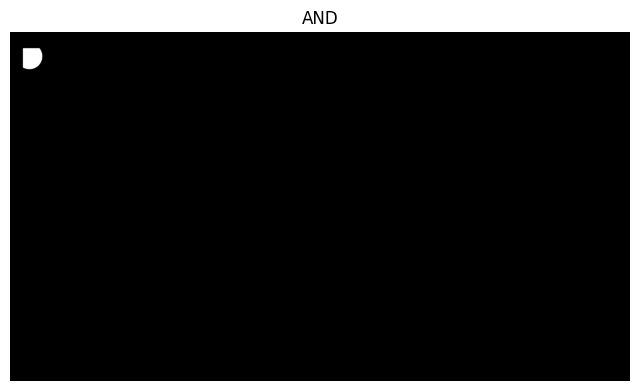

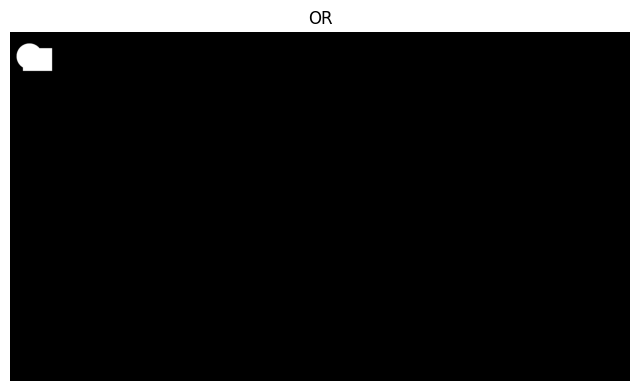

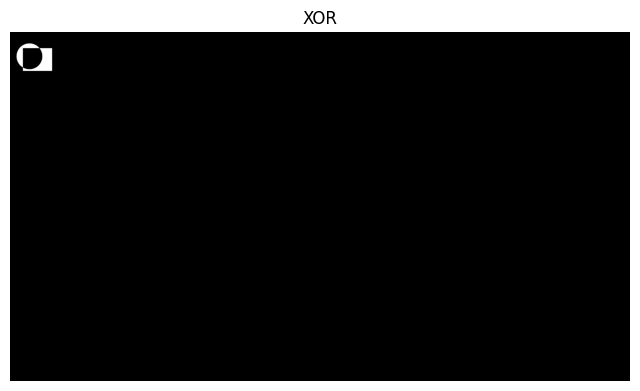

In [69]:
shape1 = np.zeros_like(img)
cv2.circle(shape1, (120,150), 80, (255,255,255), -1)

shape2 = np.zeros_like(img)
cv2.rectangle(shape2, (80,100), (260,240), (255,255,255), -1)

and_img = cv2.bitwise_and(shape1, shape2)
or_img  = cv2.bitwise_or(shape1, shape2)
xor_img = cv2.bitwise_xor(shape1, shape2)

imshow(shape1, 'Shape 1')
imshow(shape2, 'Shape 2')
imshow(and_img, 'AND')
imshow(or_img, 'OR')
imshow(xor_img, 'XOR')